QATAR WORLD CUP 2022 ANALYSIS

Intro

On my exchange semester in the UK I was lucky enough to be able to watch most of the world cup games either at home or on a night out, being in such a good time zone. 


Being a big football fan myself I wanted analyse the results of the World Cup from a data perspective

Part 1 - Loading the data

For starters, let's load the libraries

In [6]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv('Fifa_world_cup_matches.csv')
df.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [5]:
df.isnull().sum()

team1                                0
team2                                0
possession team1                     0
possession team2                     0
possession in contest                0
                                    ..
own goals team2                      0
forced turnovers team1               0
forced turnovers team2               0
defensive pressures applied team1    0
defensive pressures applied team2    0
Length: 88, dtype: int64

From the outset, we can see that the dataset needs some slight manipulation. 

For example, if I wanted to find the total number of goals scored by Argentina, I need to sum all the goals scored when Argentina was team1, and when Argentina was team2. 

DONT MODIFY THE ORIGINAL EXCEL , but USE PANDAS TO MANIPULATE A BETTER TABLE? 

Let's identify some of the data points which look interesting


- Possession - columns C and D
- Number of Goals (scored) - columns F and G
- Number of Attempts - so we can see calculate conversion (feature engineering?) clumns K and L
- Goals Conceded - columns M and N
- Assists? (indication of teamplay)
- Yellow Cards/ Red Cards
- Passes - pass completion - FEATURE - can compute accuracy




In [8]:
team_goals = df.groupby('team1')['number of goals team1'].sum().reset_index()
team_goals.columns = ['Team', 'Goals']


team_goals['Goals'] += df.groupby('team2')['number of goals team2'].sum().reset_index()['number of goals team2']

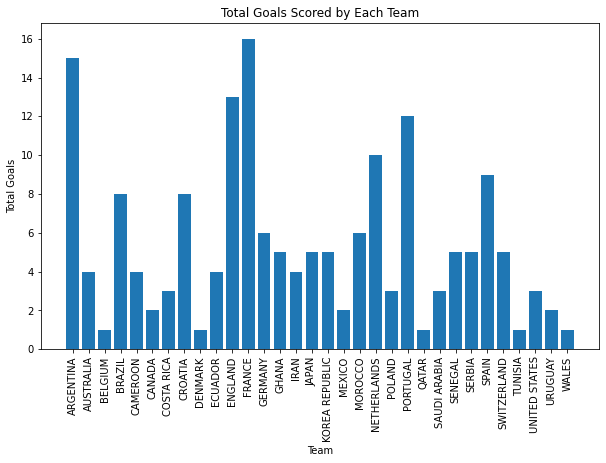

In [9]:
plt.figure(figsize=(10,6))
plt.bar(team_goals['Team'], team_goals['Goals'])
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.title('Total Goals Scored by Each Team')
plt.xticks(rotation=90)
plt.show()